In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

In [9]:
data = pd.read_csv(r"C:\Users\D\Python scripts\Sinergia-Time-Series\Data\lesson12_var.csv", index_col = 0, sep = ';')
data.head()

,GDPGR,UR
Year,,
2000,10.000067,10.581
2001,5.100051,8.978
2002,4.699992,7.875
2003,7.299952,8.210
2004,7.199948,7.763


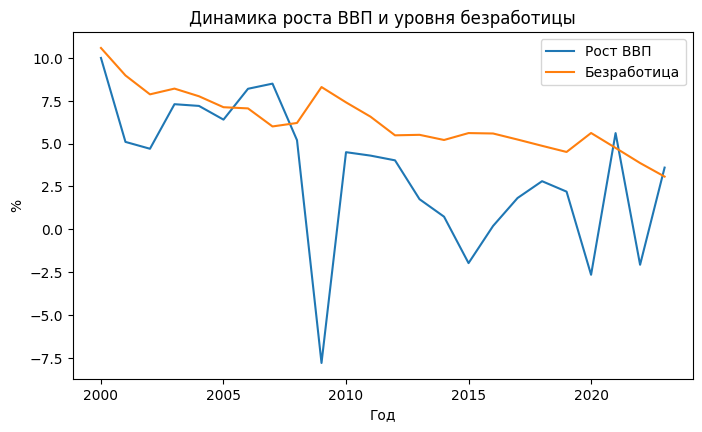

In [40]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(data['GDPGR'], label = 'Рост ВВП')
plt.plot(data['UR'], label = 'Безработица')
plt.xlabel('Год')
plt.ylabel('%')
plt.title('Динамика роста ВВП и уровня безработицы')
plt.legend()
plt.show()

In [19]:
adftest = adfuller(data['GDPGR'], maxlag = 10, regression = 'c')

dfoutput = pd.Series(
        adftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ]
)

dfoutput

Test Statistic                 -3.945414
p-value                         0.001725
#Lags Used                      0.000000
Number of Observations Used    23.000000
dtype: float64

In [20]:
adftest = adfuller(data['UR'], maxlag = 10, regression = 'c')

dfoutput = pd.Series(
        adftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ]
)

dfoutput

Test Statistic                -77.411288
p-value                         0.000000
#Lags Used                     10.000000
Number of Observations Used    13.000000
dtype: float64

In [17]:
model = VAR(data)
results = model.fit(1)
results.summary()

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 06, Dec, 2024
Time:                     23:56:29
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.16947
Nobs:                     23.0000    HQIC:                   1.94775
Log likelihood:          -80.8136    FPE:                    6.52891
AIC:                      1.87325    Det(Omega_mle):         5.10916
--------------------------------------------------------------------
Results for equation GDPGR
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -5.029640         3.148415           -1.598           0.110
L1.GDPGR         0.023368         0.195276            0.120           0.905
L1.UR            1.237407         0.505145            2.450           0.014

Res

In [18]:
results = model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 06, Dec, 2024
Time:                     23:56:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.38083
Nobs:                     22.0000    HQIC:                   2.00173
Log likelihood:          -73.1672    FPE:                    6.69297
AIC:                      1.88490    Det(Omega_mle):         4.44361
--------------------------------------------------------------------
Results for equation GDPGR
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -7.351921         3.927809           -1.872           0.061
L1.GDPGR        -0.018957         0.285231           -0.066           0.947
L1.UR            1.075019         1.318374            0.815           0.415
L2.G

In [32]:
 model.select_order(5).summary()

,AIC,BIC,FPE,HQIC
0,3.355,3.454,28.64,3.371
1,1.713,2.012*,5.577,1.764
2,1.666*,2.163,5.428*,1.750*
3,1.812,2.508,6.587,1.930
4,2.129,3.023,9.905,2.280
5,2.170,3.264,12.16,2.355


In [31]:
model.fit(maxlags = 5, ic = 'bic').summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 07, Dec, 2024
Time:                     00:24:10
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.16947
Nobs:                     23.0000    HQIC:                   1.94775
Log likelihood:          -80.8136    FPE:                    6.52891
AIC:                      1.87325    Det(Omega_mle):         5.10916
--------------------------------------------------------------------
Results for equation GDPGR
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -5.029640         3.148415           -1.598           0.110
L1.GDPGR         0.023368         0.195276            0.120           0.905
L1.UR            1.237407         0.505145            2.450           0.014

Res

In [37]:
model = VAR(data.iloc[:-3])
results = model.fit(1)
lag_order = results.k_ar
fcst = results.forecast(data.values[-lag_order:], 3)

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


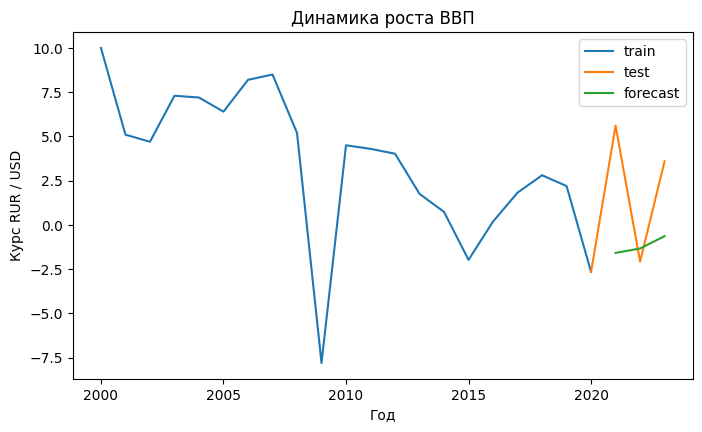

In [49]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(data.iloc[:-3]['GDPGR'], label = 'train')
plt.plot(data.iloc[-4:]['GDPGR'], label = 'test')
plt.plot(data.iloc[-3:].index, fcst[:,0], label = 'forecast')
plt.xlabel('Год')
plt.ylabel('%')
plt.title('Динамика роста ВВП')
plt.legend()
plt.show()

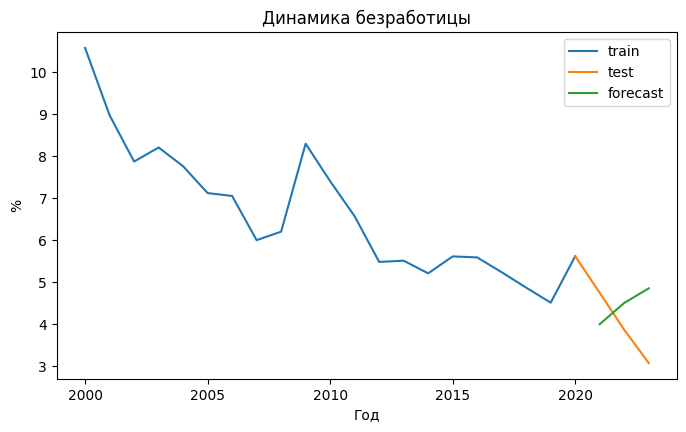

In [51]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(data.iloc[:-3]['UR'], label = 'train')
plt.plot(data.iloc[-4:]['UR'], label = 'test')
plt.plot(data.iloc[-3:].index, fcst[:,1], label = 'forecast')
plt.xlabel('Год')
plt.ylabel('%')
plt.title('Динамика безработицы')
plt.legend()
plt.show()

In [52]:
model = VAR(data.iloc[:-3])
results = model.fit(2)
lag_order = results.k_ar
fcst = results.forecast(data.values[-lag_order:], 3)

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


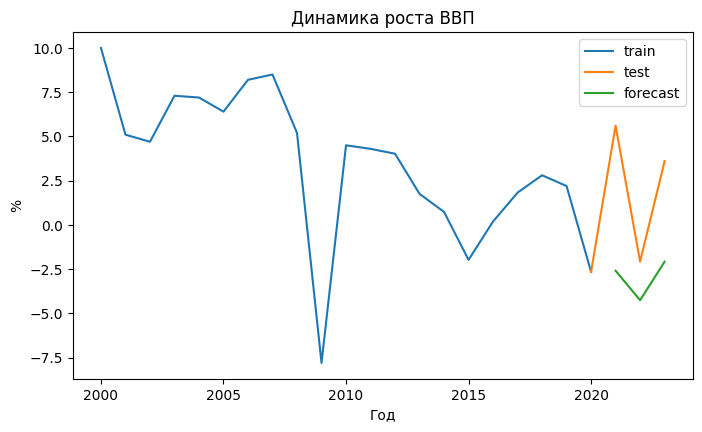

In [53]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(data.iloc[:-3]['GDPGR'], label = 'train')
plt.plot(data.iloc[-4:]['GDPGR'], label = 'test')
plt.plot(data.iloc[-3:].index, fcst[:,0], label = 'forecast')
plt.xlabel('Год')
plt.ylabel('%')
plt.title('Динамика роста ВВП')
plt.legend()
plt.show()

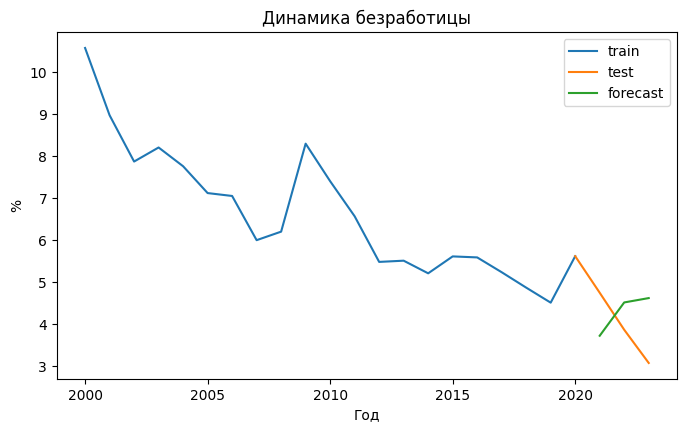

In [54]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(data.iloc[:-3]['UR'], label = 'train')
plt.plot(data.iloc[-4:]['UR'], label = 'test')
plt.plot(data.iloc[-3:].index, fcst[:,1], label = 'forecast')
plt.xlabel('Год')
plt.ylabel('%')
plt.title('Динамика безработицы')
plt.legend()
plt.show()

In [55]:
from statsmodels.tsa.stattools import grangercausalitytests

In [56]:
gc_res = grangercausalitytests(data, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.0006  , p=0.0236  , df_denom=20, df_num=1
ssr based chi2 test:   chi2=6.9007  , p=0.0086  , df=1
likelihood ratio test: chi2=6.0349  , p=0.0140  , df=1
parameter F test:         F=6.0006  , p=0.0236  , df_denom=20, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0655  , p=0.0730  , df_denom=17, df_num=2
ssr based chi2 test:   chi2=7.9342  , p=0.0189  , df=2
likelihood ratio test: chi2=6.7751  , p=0.0338  , df=2
parameter F test:         F=3.0655  , p=0.0730  , df_denom=17, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8392  , p=0.0760  , df_denom=14, df_num=3
ssr based chi2 test:   chi2=12.7763 , p=0.0051  , df=3
likelihood ratio test: chi2=9.9800  , p=0.0187  , df=3
parameter F test:         F=2.8392  , p=0.0760  , df_denom=14, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2850  , p=0.3340  , df_d